# <span style="color:black"> LSN-Esercitazione numerica 2</span>


## <span style="color:blue">  Esercizio 02.1</span>

Ho valutato l'integrale unidimensionale $I$ con metodi Monte Carlo tramite campionamento di punti distribuiti uniformemente nell'intervallo unitario: 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

Descrivo i risulati ottenuti attraverso la media a blocchi di $10^6$ generazioni, suddivise in 100 blocchi.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x, sum_prog, err_prog = np.loadtxt('Es02.1.1.res', usecols=(0,1,2), unpack='true')
x2, sum_prog2, err_prog2 = np.loadtxt('Es02.1.2.res', usecols=(0,1,2), unpack='true')

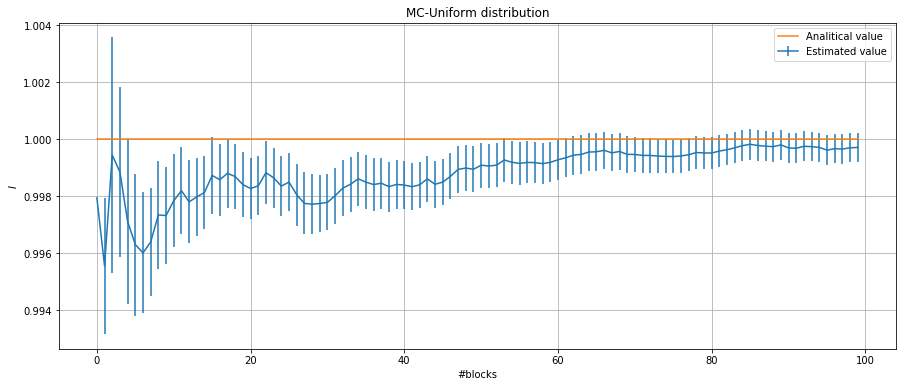

In [4]:
plt.figure(figsize=(15,6))
plt.errorbar(x,sum_prog,yerr=err_prog, label="Estimated value")
plt.plot(x, 1-x+x, label="Analitical value")
plt.title("MC-Uniform distribution")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$I$')
plt.grid(True)
plt.show()

Si è calcolato il medesimo integrale attraverso la tecnica dell'**importance sampling**: la distribuzione di probabilità scelta non è più, quindi, uniforme ma ne ho scelta, per ridurre le incertezze, una con andamento più simile a quello della funzione integranda.

Per poter ottenere una distribuzione cumulativa semplice da invertire ho scelto una distribuzione con andamento lineare: $f(x)=2(1-x)$, già opportunamente normalizzata, da cui è possibile campionare punti $y$ nell'intervallo $[0,1)$ secondo la distribuzione desiderata generando dei punti $x$ distribuiti uniformemente nel medesimo intervallo.

$$F(x) = \int_0^x (2-2x') \mathrm d x'=2x-x^2$$
$$y=F^{-1}(x)=1-\sqrt{1-x}$$

Si mostrano, nella figura seguente, gli andamenti delle due distribuzioni e della funzione integranda per giustificare la scelta fatta.

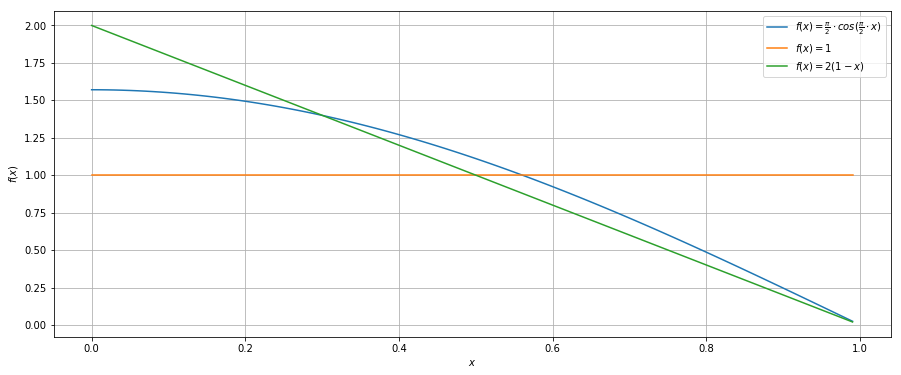

In [5]:
plt.figure(figsize=(15,6))
z=np.arange(0.0, 1.0, 0.01)
y=np.ones(np.size(z))
plt.plot(z, np.pi/2*np.cos(np.pi/2*z), label=r'$f(x)=\frac{\pi}{2}\cdot cos(\frac{\pi}{2}\cdot x)$')
plt.plot(z, y, label=r'$f(x)=1$')
plt.plot(z, -2*z+2, label=r'$f(x)=2(1-x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.legend()
plt.show()

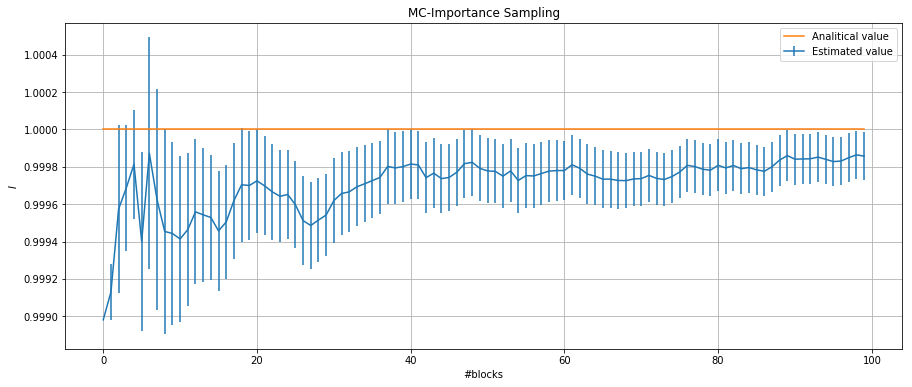

In [6]:
plt.figure(figsize=(15,6))
plt.errorbar(x2,sum_prog2,yerr=err_prog2, label="Estimated value")
plt.plot(x2, 1-x2+x2, label="Analitical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$I$')
plt.title("MC-Importance Sampling")
plt.grid(True)
plt.show()

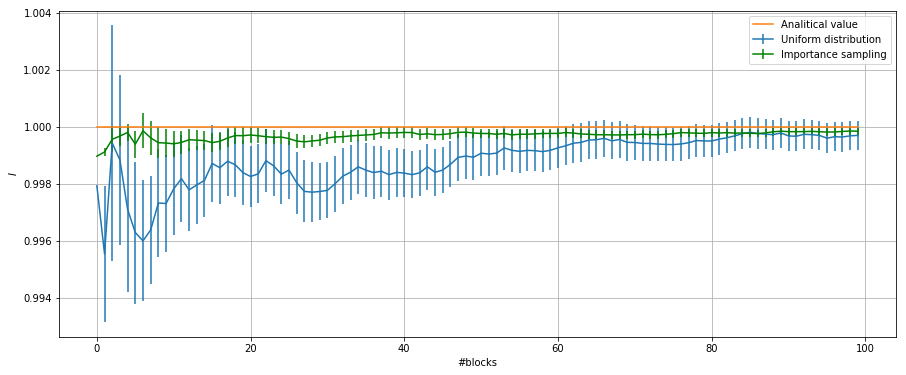

In [7]:
plt.figure(figsize=(15,6))
plt.errorbar(x,sum_prog,yerr=err_prog, label="Uniform distribution")
plt.errorbar(x2,sum_prog2,yerr=err_prog2, label="Importance sampling", color="green")
plt.plot(x2, 1-x2+x2, label="Analitical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$I$')
plt.grid(True)
plt.show()

Si osserva come la scelta fatta per l'importance sampling porti ad un valore stimato già compatibile con quello vero dai primi blocchi: inoltre si nota come le barre di errore descriventi l'incertezza stimata con il metodo del Data-Blocking siano notevolemnte più piccole di quelle ricavate da un campionamento uniforme (vi è un fattore 5 fra per le due).

## <span style="color:blue">  Esercizio 02.2</span>

Ho scritto un codice che descrivesse il processo di Random Walk 3D all'interno di un reticolo cubico e nel continuo, entrambi di passo $a=1$.

* Per il primo caso, per sceglere la coordinata sulla quale compiere il passo, ho estratto un intero causuale fra 0,1,2 e ho incrementato il vettore $r$ nella componente corrispondente di una quantità $sign \cdot a $, dove $sign$ è definito dall'estrazione di un numero casuale $q$ nell'intervallo unitario (+1 se $q<0.5$, -1 altrimenti).

* Per descrivere un RW nel continuo ho estratto una direzione casuale sulla quale compiere il passo andando a campionare uniformemente su di un angolo solido attraverso la generazione della coppia $\phi \sim \mathcal{U}[0,2\pi)$, $\theta=arcos(1-2y)$ con $y \sim \mathcal{U}[0,1)$. Il passo è quindi descritto dalle coordinate sferiche:
$$\begin{cases}
  x = a \cdot sin\theta sin\phi \\
  y = a \cdot sin\theta sin\phi\\
  z = a \cdot cos\theta
\end{cases}$$

Mostro l'andamento di  $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ in funzione del numero di step nell'intervallo $[1,10^2]$. Per la stima dell'incertezza ho eseguito la media a blocchi, applicata a 100 di essi, del valore richiesto senza la radice: ho estratto l'incertezza legata all'ultimo blocco, per ogni passo, e ho ricavato l'errore dei dati descritti attraverso la propagazione degli errori (le barre di errore risultano così molto ridotte e poco visibili nei grafici).

Ho provato a fittare i dati ottenuti in entrambi i casi con una legge di potenza $f(N)=k \cdot N^m$, per verificare l'andamento diffusivo.

Optimized parameters [k,m] =
[1.00266474 0.50006851]
Parameters uncertainty =
[0.00103274 0.00024876]


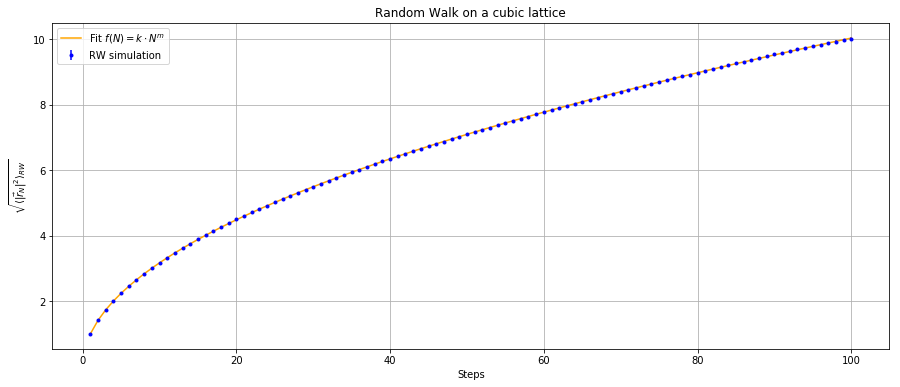

In [3]:
import scipy.optimize as opt;


def func(x, k, m):
     return k*(x**m)


step, r, err_r = np.loadtxt('Es02.2.1.res', usecols=(0,1,2), unpack='true')
plt.figure(figsize=(15,6))

plt.errorbar(step,r, yerr=err_r, fmt='b.', label="RW simulation")
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.xlabel("Steps")
optimizedParameters, pcov = opt.curve_fit(func, step, r)
plt.plot(step, func(step, *optimizedParameters), color="orange", label="Fit $f(N)=k \cdot N^m$")
plt.legend()
plt.grid(True)
plt.legend()
plt.title("Random Walk on a cubic lattice")

print("Optimized parameters [k,m] =")
print(optimizedParameters)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(pcov)))


Optimized parameters [k,m] =
[1.0092866  0.49792064]
Parameters uncertainty =
[0.00158758 0.00037998]


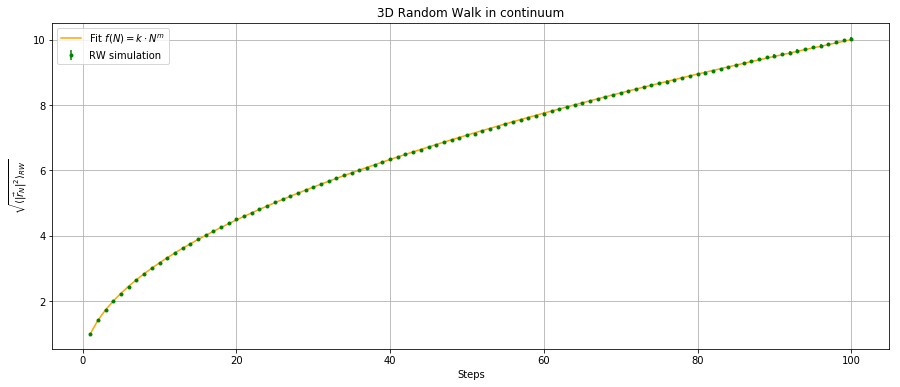

In [4]:
step2, r2, err_r2 = np.loadtxt('Es02.2.2.res', usecols=(0,1,2), unpack='true')

plt.figure(figsize=(15,6))
plt.errorbar(step2,r2, yerr=err_r2, fmt='g.', label="RW simulation")
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.xlabel("Steps")
optimizedParameters, pcov = opt.curve_fit(func, step2, r2);
plt.plot(step2, func(step2, *optimizedParameters), label="Fit $f(N)=k \cdot N^m$", color="orange");
plt.legend()
plt.grid(True)
plt.title("3D Random Walk in continuum")

print("Optimized parameters [k,m] =")
print(optimizedParameters)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(pcov)))


In enrambi i casi l'andamento è quello atteso: la costante moltiplicativa estrapolata dal fit e l'esponente della legge di potenza sono compatibili, rispettivamente, con la radice del passo e con $1/2$.
La simulazione dei due random walk, quindi, descrive un comportamento diffusivo.